# 目標：預測期貨做多或是做空
### 資料特徵 X
### 資料標籤 Y：
## 1. 做多: 上漲1% or 其他


### 訓練模型：SVM

## 資料整理：
### 加權指數 2330 2317 小台


## 載入資料

In [1]:
%pylab inline
import random
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
df = pd.read_excel('data.xlsx', sheetname="Data")

In [3]:
df.shape

(4084, 40)

In [4]:
# 去頭去尾
df = df.iloc[50:-5:,:] 

# 只取期貨大於7500資料
df = df[df['D20'] > 7000]
df.shape

(2505, 40)

In [5]:
df.B1[df.B1 == 0] = 1 
df.B2[df.B2 == 0] = 1 
df.B3[df.B3 == 0] = 1 
df.C1[df.C1 == 0] = 1 
df.C2[df.C2 == 0] = 1 
df.C3[df.C3 == 0] = 1 
df.D4[df.D4 == 0] = 1 
df.D5[df.D5 == 0] = 1 
df.D6[df.D6 == 0] = 1 
df.D7[df.D7 == 0] = 1 
df.D8[df.D8 == 0] = 1 
df.D9[df.D9 == 0] = 1 
df.D10[df.D10 == 0] = 1 
df.D11[df.D11 == 0] = 1 
df.D12[df.D12 == 0] = 1 
df.D13[df.D13 == 0] = 1 
df.D14[df.D14 == 0] = 1 
df.D15[df.D15 == 0] = 1 
df.D16[df.D16 == 0] = 1 
df.D17[df.D17 == 0] = 1 
df.D18[df.D18 == 0] = 1 
df.D19[df.D19 == 0] = 1 

In [6]:
df

,A0,A1,A2,A3,A4,A5,B0,B1,B2,B3,...,D14,D15,D16,D17,D18,D19,D20,D21,D22,Y
657,2004-03-02,557.0130,17.6868,220.8005,220.8005,123.594660,2004-03-02,1,1,1,...,1,1,1,-1,-1,1,7055,-4,-0.056697,0
658,2004-03-03,558.5814,21.8635,247.0491,247.0491,263.565113,2004-03-03,1,1,1,...,1,1,1,1,-1,1,7012,-82,-1.169424,0
659,2004-03-04,579.3726,13.7851,247.0864,247.0864,369.866727,2004-03-04,1,1,1,...,1,1,1,1,-1,1,7150,-228,-3.188811,0
660,2004-03-05,702.6233,7.4086,223.1341,223.1341,479.897627,2004-03-05,1,1,1,...,1,1,1,1,1,1,7075,-268,-3.787986,0
662,2004-03-09,922.5151,-12.2075,224.1651,224.1651,122.909587,2004-03-09,1,1,1,...,1,1,-1,1,1,-1,7051,-496,-7.034463,0
1187,2006-04-19,966.8440,-61.8380,21.0130,21.0130,157.639607,2006-04-19,1,1,1,...,1,1,1,1,1,1,7042,166,2.357285,1
1188,2006-04-20,959.1329,-60.1116,50.7276,50.7276,133.404640,2006-04-20,1,1,1,...,1,1,1,1,1,1,7121,55,0.772363,1
1189,2006-04-21,961.0694,-74.0372,68.2955,68.2955,190.450193,2006-04-21,1,1,1,...,1,1,1,1,1,1,7105,75,1.055595,1
1190,2006-04-24,921.8751,-69.2948,136.0380,136.0380,169.723293,2006-04-24,1,1,1,...,1,1,1,1,1,1,7081,138,1.948877,1
1191,2006-04-25,952.4723,-59.6989,178.7364,178.7364,196.169413,2006-04-25,1,1,1,...,1,1,1,1,1,1,7053,214,3.034170,1


## 訓練資料 and 測試資料

In [7]:
pd.value_counts(df['Y'].values, sort=False)
y = df['Y']

In [8]:
X = df.drop(['Y','A0','B0','C0','D0','D20','D21','D22'], 1)
X.head()

,A1,A2,A3,A4,A5,B1,B2,B3,B4,C1,...,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19
657,557.0130,17.6868,220.8005,220.8005,123.594660,1,1,1,-31909,1,...,1,1,1,1,1,1,1,-1,-1,1
658,558.5814,21.8635,247.0491,247.0491,263.565113,1,1,1,-8568,-1,...,1,1,1,1,1,1,1,1,-1,1
659,579.3726,13.7851,247.0864,247.0864,369.866727,1,1,1,27084,-1,...,1,1,1,1,1,1,1,1,-1,1
660,702.6233,7.4086,223.1341,223.1341,479.897627,1,1,1,76278,-1,...,1,1,1,1,1,1,1,1,1,1
662,922.5151,-12.2075,224.1651,224.1651,122.909587,1,1,1,130029,-1,...,1,1,1,1,1,1,-1,1,1,-1


In [9]:
X.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'C1', 'C2', 'C3',
       'C4', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10',
       'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19'],
      dtype='object')

## 訓練資料 and 測試資料

In [10]:
X.shape

(2505, 32)

In [11]:
y.shape

(2505,)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
X_train.shape

(2004, 32)

In [14]:
X_test.shape

(501, 32)

In [15]:
y_train.shape

(2004,)

In [16]:
y_test.shape

(501,)

## 尺度標準化

In [17]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train

array([[-0.36123471, -0.54695339, -0.16281259, ..., -1.01711247,
        -0.98908156, -1.02118238],
       [-1.65117216,  0.37665142, -1.25339786, ...,  0.98317544,
        -0.98908156, -1.02118238],
       [-0.3512124 ,  0.60314318, -1.97399774, ..., -1.01711247,
        -0.98908156,  0.979257  ],
       ..., 
       [-0.06430036, -0.46426539,  0.32536972, ..., -1.01711247,
        -0.98908156, -1.02118238],
       [ 0.90586984, -0.92339285,  0.05368401, ..., -1.01711247,
         1.01103897, -1.02118238],
       [ 0.72038273, -0.14508857,  0.0744911 , ...,  0.98317544,
        -0.98908156,  0.979257  ]])

In [18]:
X_test = sc.transform(X_test)
X_test

array([[-1.14668068,  0.53602047, -0.06817949, ..., -1.01711247,
        -0.98908156, -1.02118238],
       [-0.31938156, -1.47268625,  0.51092737, ...,  0.98317544,
         1.01103897, -1.02118238],
       [-0.10305261, -0.16161069,  0.43597939, ..., -1.01711247,
         1.01103897,  0.979257  ],
       ..., 
       [ 0.27042128,  0.0699848 ,  1.15769899, ...,  0.98317544,
         1.01103897, -1.02118238],
       [-2.50674747, -0.4951915 , -1.10448888, ..., -1.01711247,
        -0.98908156, -1.02118238],
       [ 0.2759572 ,  5.37884695,  3.90209511, ..., -1.01711247,
        -0.98908156,  0.979257  ]])

## 訓練ANN

In [19]:
X_train.shape

(2004, 32)

In [20]:
classifier = Sequential()

classifier.add(Dense(units = 16, kernel_initializer = 'random_normal', activation = 'relu', input_dim = 32))
classifier.add(Dense(units = 22, kernel_initializer = 'random_normal', activation = 'relu', input_dim = 16))
classifier.add(Dense(units = 9, kernel_initializer = 'random_normal', activation = 'relu', input_dim = 22))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [21]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 10, epochs = 250)

Epoch 1/250
2004/2004 [==============================] - 0s - loss: 0.6908 - acc: 0.5529     
Epoch 2/250
2004/2004 [==============================] - 0s - loss: 0.6821 - acc: 0.5534     
Epoch 3/250
2004/2004 [==============================] - 0s - loss: 0.6783 - acc: 0.5649     
Epoch 4/250
2004/2004 [==============================] - 0s - loss: 0.6712 - acc: 0.5923     
Epoch 5/250
2004/2004 [==============================] - 0s - loss: 0.6632 - acc: 0.6228     
Epoch 6/250
2004/2004 [==============================] - 0s - loss: 0.6505 - acc: 0.6407     
Epoch 7/250
2004/2004 [==============================] - 0s - loss: 0.6437 - acc: 0.6377     
Epoch 8/250
2004/2004 [==============================] - 0s - loss: 0.6357 - acc: 0.6577     
Epoch 9/250
2004/2004 [==============================] - 0s - loss: 0.6299 - acc: 0.6557     
Epoch 10/250
2004/2004 [==============================] - 0s - loss: 0.6192 - acc: 0.6722     
Epoch 11/250
2004/2004 [==============================] - 0

2004/2004 [==============================] - 0s - loss: 0.3769 - acc: 0.8498     
Epoch 88/250
2004/2004 [==============================] - 0s - loss: 0.3799 - acc: 0.8408     
Epoch 89/250
2004/2004 [==============================] - 0s - loss: 0.3723 - acc: 0.8493     
Epoch 90/250
2004/2004 [==============================] - 0s - loss: 0.3650 - acc: 0.8513     
Epoch 91/250
2004/2004 [==============================] - 0s - loss: 0.3794 - acc: 0.8388     
Epoch 92/250
2004/2004 [==============================] - 0s - loss: 0.3666 - acc: 0.8593     
Epoch 93/250
2004/2004 [==============================] - 0s - loss: 0.3694 - acc: 0.8513     
Epoch 94/250
2004/2004 [==============================] - 0s - loss: 0.3656 - acc: 0.8503     
Epoch 95/250
2004/2004 [==============================] - 0s - loss: 0.3646 - acc: 0.8518     
Epoch 96/250
2004/2004 [==============================] - 0s - loss: 0.3647 - acc: 0.8443     
Epoch 97/250
2004/2004 [==============================] - 0s - 

2004/2004 [==============================] - 0s - loss: 0.2897 - acc: 0.8872     
Epoch 173/250
2004/2004 [==============================] - 0s - loss: 0.2744 - acc: 0.8887     
Epoch 174/250
2004/2004 [==============================] - 0s - loss: 0.2728 - acc: 0.8937     
Epoch 175/250
2004/2004 [==============================] - 0s - loss: 0.2688 - acc: 0.8967     
Epoch 176/250
2004/2004 [==============================] - 0s - loss: 0.2656 - acc: 0.8942     
Epoch 177/250
2004/2004 [==============================] - 0s - loss: 0.2751 - acc: 0.8942     
Epoch 178/250
2004/2004 [==============================] - 0s - loss: 0.2594 - acc: 0.8972     
Epoch 179/250
2004/2004 [==============================] - 0s - loss: 0.2657 - acc: 0.8967     
Epoch 180/250
2004/2004 [==============================] - 0s - loss: 0.2666 - acc: 0.8922     
Epoch 181/250
2004/2004 [==============================] - 0s - loss: 0.2661 - acc: 0.8942     
Epoch 182/250
2004/2004 [=============================

## 預測與驗證模型

In [22]:
y_pred = classifier.predict(X_test)

In [23]:
y_pred

array([[  9.46981490e-01],
       [  2.69507289e-01],
       [  3.84993628e-02],
       [  3.50851059e-01],
       [  1.00000000e+00],
       [  9.81014848e-01],
       [  3.04998655e-04],
       [  4.27382112e-01],
       [  1.21486954e-01],
       [  9.96594965e-01],
       [  1.99437141e-01],
       [  6.74628885e-04],
       [  2.51496956e-03],
       [  9.99291301e-01],
       [  4.08386753e-04],
       [  8.77649367e-01],
       [  2.77890431e-05],
       [  5.39067434e-03],
       [  3.66294414e-01],
       [  9.71891801e-04],
       [  1.30615648e-04],
       [  1.15605406e-02],
       [  5.85557893e-03],
       [  3.29005271e-02],
       [  1.18925783e-03],
       [  1.26278326e-02],
       [  9.80191112e-01],
       [  7.16266692e-01],
       [  7.78355028e-13],
       [  2.40025148e-01],
       [  3.35594791e-07],
       [  8.72364640e-01],
       [  9.18685123e-02],
       [  9.99995112e-01],
       [  9.73156929e-01],
       [  7.26273581e-02],
       [  9.54331532e-02],
 

In [24]:
y_pred = (y_pred > 0.6)
y_pred

array([[ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [25]:
sum(y_pred.flatten().astype(int) == y_test) / len(y_test)

0.63273453093812371

In [26]:
cm = confusion_matrix(y_test, y_pred )
cm

array([[222,  64],
       [120,  95]])

## 繪製ANN 的 ROC Curve

In [27]:
y_pred = classifier.predict(X_test)
predicted = (y_pred > 0.6).flatten().astype(int)

In [28]:
predicted

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0,

In [29]:
confusion_matrix(y_test, predicted)

array([[222,  64],
       [120,  95]])

In [30]:
fpr_ary, tpr_ary, thresholds = roc_curve(y_test, y_pred)

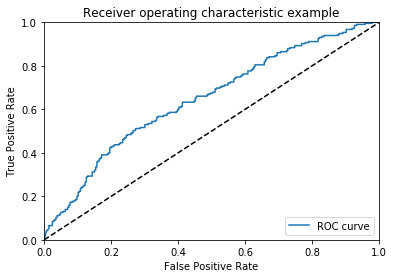

In [31]:
plt.plot(fpr_ary, tpr_ary, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## 比較不同分類器準確度

In [32]:
# ANN
classifier

In [33]:
clf1 = DecisionTreeClassifier()
clf1.fit(X_train, y_train)

clf2 = SVC(probability = True)
clf2.fit(X_train, y_train)

clf3 = LogisticRegression()
clf3.fit(X_train, y_train)

clf4 = RandomForestClassifier()
clf4.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

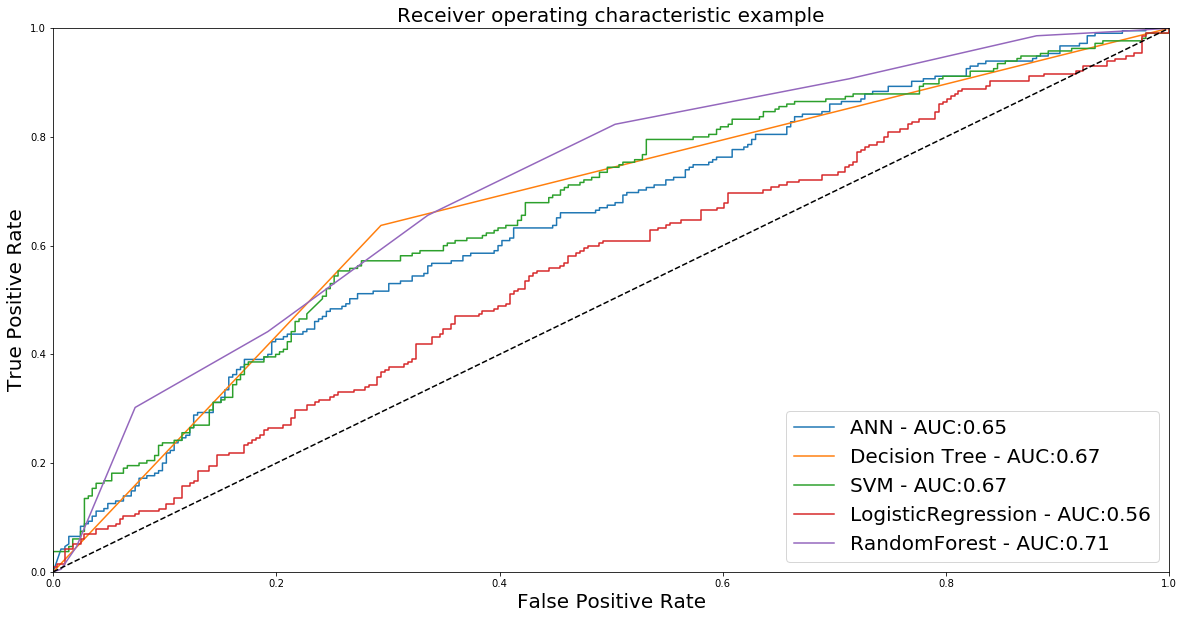

In [35]:
from sklearn.metrics import auc
plt.figure(figsize= [20,10])
for clf, title in zip([classifier,clf1,clf2,clf3, clf4], ['ANN','Decision Tree', 'SVM', 'LogisticRegression', 'RandomForest']):
    if title != 'ANN':
        probas_ = clf.fit(X_train, y_train).predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    else:
        y_pred = clf.predict(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()

## SVM

In [36]:
y_pred = clf2.predict(X_test)

In [37]:
predicted = (y_pred > 0.6).flatten().astype(int)

In [38]:
confusion_matrix(y_test, predicted)

array([[223,  63],
       [115, 100]])

## 隨機森林

In [52]:
y_pred = clf4.predict(X_test)

In [57]:
y_pred

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0,

In [40]:
predicted = (y_pred > 0.5).flatten().astype(int)

In [56]:
predicted

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0,

In [41]:
confusion_matrix(y_test, predicted)

array([[231,  55],
       [120,  95]])